In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [ ]:
data = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42)

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[0])

In [ ]:
def initialize_centroids(data, k):
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    return centroids

def compute_distances(data, centroids):
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
    return distances

def assign_clusters(distances):
    return np.argmin(distances, axis=0)

def updateCentroids(data, clusters, k):
    centroids = np.array([data[clusters == i].mean(axis=0) for i in range(k)])
    return centroids

def k_means(data, k, max_iterations=100):
    centroids = initialize_centroids(data, k)

    for _ in range(max_iterations):
        distances = compute_distances(data, centroids)
        clusters = assign_clusters(distances)
        new_centroids = updateCentroids(data, clusters, k)

        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return clusters, centroids

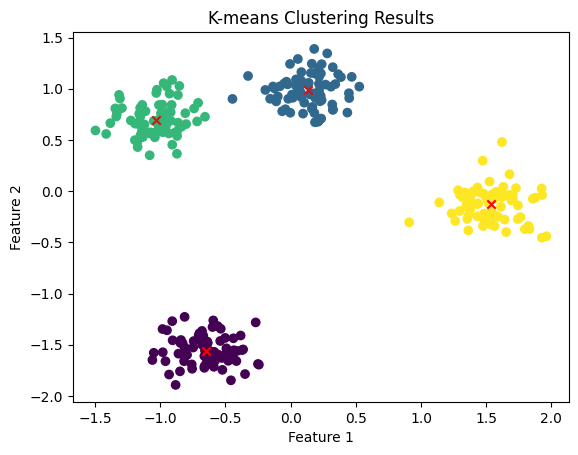

In [ ]:
clusters_kmeans, centroids_kmeans = k_means(data_scaled, 4)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters_kmeans, cmap='viridis')
plt.scatter(centroids_kmeans[:, 0], centroids_kmeans[:, 1], c='red', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering Results')
plt.show()

In [ ]:
def initialize_medoids(data, k):
    medoids_idx = np.random.choice(len(data), k, replace=False)
    medoids = data[medoids_idx]
    return medoids

def compute_dissimilarities(data, medoids):
    dissimilarities = np.zeros((len(data), len(medoids)))
    for i, point in enumerate(data):
        for j, medoid in enumerate(medoids):
            dissimilarities[i, j] = np.linalg.norm(point - medoid)
    return dissimilarities

def assign_clusters(dissimilarities):
    clusters = np.argmin(dissimilarities, axis=1)
    return clusters

def update_medoids(data, clusters, k):
    medoids = np.zeros((k, data.shape[1]))
    for i in range(k):
        cluster_points = data[clusters == i]
        cluster_dissimilarities = compute_dissimilarities(cluster_points, cluster_points)
        cluster_sum_dissimilarities = np.sum(cluster_dissimilarities, axis=1)
        medoids[i] = cluster_points[np.argmin(cluster_sum_dissimilarities)]
    return medoids

def k_medoids(data, k, max_iterations=100):
    medoids = initialize_medoids(data, k)
    for _ in range(max_iterations):
        dissimilarities = compute_dissimilarities(data, medoids)
        clusters = assign_clusters(dissimilarities)
        new_medoids = update_medoids(data, clusters, k)
        if np.all(medoids == new_medoids):
            break
        medoids = new_medoids
    return clusters, medoids

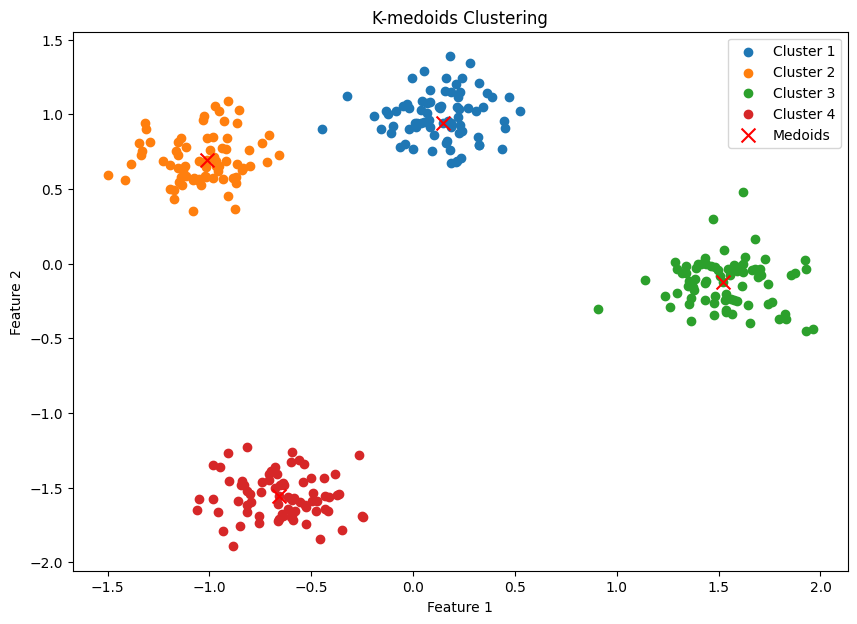

In [ ]:
k = 4
clusters, medoids = k_medoids(data_scaled, k)

plt.figure(figsize=(10, 7))
for i in range(k):
    cluster_points = data_scaled[clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')
plt.scatter(medoids[:, 0], medoids[:, 1], c='red', marker='x', s=100, label='Medoids')
plt.title('K-medoids Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()